<div class="alert alert-success"> 
        <h1 align="center" style="color:chocolate;">Essay Scoring Analysis
</h1>  
     
</div>

<div style="background-color: black; padding: 20px; border-radius: 10px; margin: 20px auto; max-width: 600px;">
    <center>
        <div style="background-color: yellow; padding: 20px; border-radius: 10px;">
            <b style="font-size: 24px; color: #ff6600;">👏😊 &nbsp; IF YOU FIND THIS HELPFUL, PLEASE UPVOTE! &nbsp; 💢👏</b>
            <div style="margin-top: 20px; font-size: 18px; color: black;">
                🥽🖥This took quite a bit of effort on my part, and while it might seem trivial, 🏆🏆receiving your appreciation means a lot to me! 😅🎃 Your upvotes inspire me to keep creating helpful content like this🖥🍱.
            </div>
        </div>
    </center>
</div>

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #7FFFD4; font-size:100%; text-align:left">

<h3 align="center"><font color='#DAA520'>💡 About The Competition :</font></h3>
    
**Task**: Predict the holistic score of argumentative essays based on a dataset comprising approximately 24,000 student-written essays. Each essay is scored on a scale of 1 to 6 using a Holistic Scoring Rubric.

**Dataset**: The dataset includes a training set (train.csv) containing essay IDs, full text, and corresponding scores, and a test set (test.csv) with essay IDs and full text. The sample_submission.csv file provides a template for submitting predictions.

**Objective**:  Develop an open-source essay scoring algorithm using the largest open-access writing dataset aligned with current standards for student-appropriate assessments. The goal is to improve upon the original Automated Student Assessment Prize (ASAP) competition hosted in 2012 by producing a more accurate and widely accessible AWE solution.
    
**Exploration**: Explore the distribution of essay scores in the training set to understand the dataset's balance. Conduct preprocessing steps such as tokenization, stopword removal, and text cleaning. Examine potential differences between the provided dataset and previous AWE competitions, ensuring inclusivity and diversity across economic and location populations to mitigate algorithmic bias.

**Evaluation**: Submissions will be evaluated based on their ability to predict the holistic score of essays in the test set. Performance will be assessed using appropriate regression metrics, such as mean squared error (MSE) or mean absolute error (MAE).

**Submission**: Prepare predictions for the holistic scores of essays in the test set in the specified format (sample_submission.csv). Aim to develop a robust essay scoring algorithm that provides accurate predictions and contributes to improving educational tools for students and educators, particularly in underserved districts.

<div class="alert alert-success">  
    <h1 align="center" style="color:darkgoldenrod;">Importing Libraries</h1>  
     
</div>

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #7FFFD4; font-size:100%; text-align:left">

<h3 align="center"><font color='#DAA520'>💡 About The Packages :</font></h3>
    
🎭we are Importing several Python packages u
    
🧨 Sklearn have,Kfold, mean_squared_error, mean_absolute_error, median_absolute_error.


🥽 XGBoost (eXtreme Gradient Boosting) and LightGBM are both powerful machine learning algorithms used for supervised learning tasks, particularly in the realm of gradient boosting

    
🎍Numpy, Pandas, Matplotlib, Seaborn :NumPy for numerical computing, Pandas for data manipulation, Matplotlib for plotting, and Seaborn for statistical visualization.
    



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_hist_gradient_boosting  
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import median_absolute_error
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from textblob import TextBlob
import gensim
from gensim import corpora
from pprint import pprint
from pyLDAvis import gensim
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.image as mpimg
from sklearn.metrics import cohen_kappa_score
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor
from catboost import CatBoostRegressor
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_train = pd.read_csv('/kaggle/input/learning-agency-lab-automated-essay-scoring-2/train.csv')
df_test  = pd.read_csv('/kaggle/input/learning-agency-lab-automated-essay-scoring-2/test.csv')
df_sub = pd.read_csv('/kaggle/input/learning-agency-lab-automated-essay-scoring-2/sample_submission.csv')

In [ ]:
df_train.describe()

In [ ]:
df_train.shape

In [ ]:
df_train.head()

In [ ]:
df_test.shape

In [ ]:
df_test.head()

In [ ]:
df_sub.head()

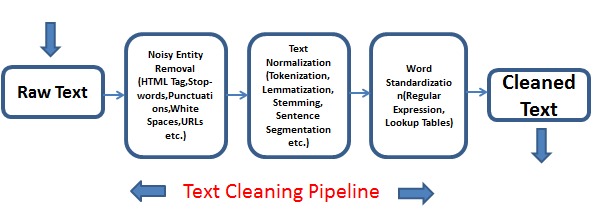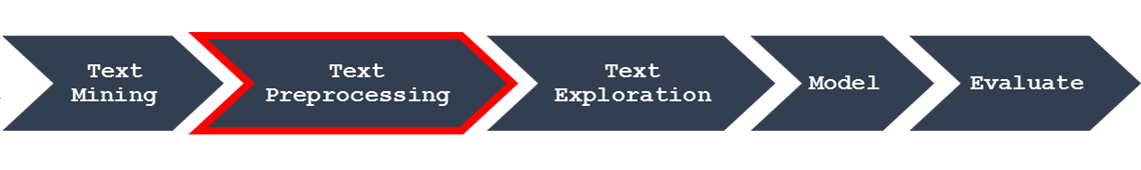

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re
import string


def remove_html_tags(text):  
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)


def preprocess_text(text):  
    text = text.lower()  
    text = remove_html_tags(text)  
    text = re.sub("@\w+", '', text)
    text = re.sub("'\d+", '', text)
    text = re.sub("\d+", '', text)
    text = re.sub("http\w+", '', text)
    text = re.sub(r"\s+", " ", text)
    text = re.sub(r"\.+", ".", text)
    text = re.sub(r"\,+", ",", text)
    text = text.strip()
    tokens = word_tokenize(text)
    tokens = [token for token in tokens if token not in string.punctuation]
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]   
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

In [ ]:
text = "Many people have cars where they live. The thing is, some areas have more cars than others."
preprocessed_text = preprocess_text(text)
print(preprocessed_text)

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='skyblue').generate(' '.join(df_train['full_text']))
plt.figure(figsize=(20, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Full Text')
plt.show()

In [ ]:
essay_lengths = df_train['full_text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 6))
sns.histplot(essay_lengths, bins=30, kde=True)
plt.title('Distribution of Essay Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Count')
plt.show()

In [ ]:
bird_path = '/kaggle/input/essaytil/44.png'
bird = mpimg.imread(bird_path)
imagebox = OffsetImage(bird, zoom=0.5)


xy = (0.5, 0.7)
ab = AnnotationBbox(imagebox, xy, frameon=False, pad=1, xybox=(5,3000))
plt.figure(figsize=(28, 6))
sns.countplot(data=df_train, x='score')
plt.gca().add_artist(ab)

plt.title('Distribution of Essay Scores', fontsize=16)
plt.xlabel('Score', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [ ]:
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

In [ ]:
bird_path = '/kaggle/input/essaytil/55.png'
bird = mpimg.imread(bird_path)
imagebox = OffsetImage(bird, zoom=0.5)

xy = (0.5, 0.7)
ab = AnnotationBbox(imagebox, xy, frameon=False, pad=1, xybox=(-0.1,1000))

df_train['sentiment_score'] = df_train['full_text'].apply(get_sentiment)
plt.figure(figsize=(45, 10))
plt.hist(df_train['sentiment_score'], bins=30, color='lightgreen', edgecolor='black')
plt.gca().add_artist(ab)

plt.title('Distribution of Sentiment Scores for rewritten text', fontsize=30)
plt.xlabel('Sentiment Score', fontsize=30)
plt.ylabel('Frequency', fontsize=30)
plt.xticks(rotation=45, fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [ ]:
from collections import Counter
import squarify

all_text = ' '.join(df_train['full_text'][:1])
words = all_text.split()
word_counts = Counter(words)
plt.figure(figsize=(20, 10))
squarify.plot(sizes=word_counts.values(), label=word_counts.keys(), alpha=0.8)
plt.title('Treemap of Word Frequency in Essays')
plt.axis('off')
plt.show()

In [ ]:
import plotly.express as px

all_text = ' '.join(df_train['full_text'])
words = all_text.split()
word_counts = Counter(words)
word_counts_df = pd.DataFrame.from_dict(word_counts, orient='index', columns=['count'])
word_counts_df.reset_index(inplace=True)
word_counts_df.columns = ['word', 'count']
word_counts_df = word_counts_df.sort_values(by='count', ascending=False)


fig = px.sunburst(word_counts_df.head(100), path=['word'], values='count',
                  title='Sunburst Plot of Word Frequency in Essays',
                  width=800, height=800)

fig.show()

In [ ]:
top_words = df_train['full_text'].str.split(expand=True).stack().value_counts().head(20)
plt.figure(figsize=(10, 6))
top_words.plot(kind='bar')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top 20 Most Frequent Words in Essays')
plt.show()

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #7FFFD4; font-size:100%; text-align:left">

<h3 align="center"><font color='#DAA520'>💡 Observation from above plot :</font></h3>
    
wip

In [ ]:
df_train.columns,df_test.columns

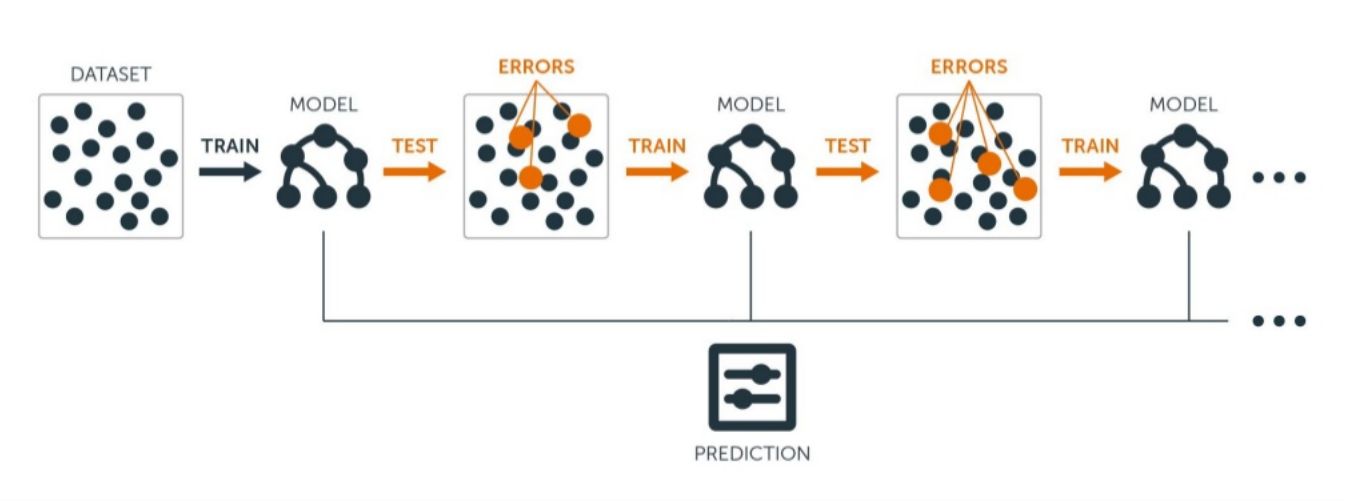

In [ ]:
df_train.shape

In [ ]:
df_train = pd.read_csv('/kaggle/input/learning-agency-lab-automated-essay-scoring-2/train.csv')
df_test  = pd.read_csv('/kaggle/input/learning-agency-lab-automated-essay-scoring-2/test.csv')

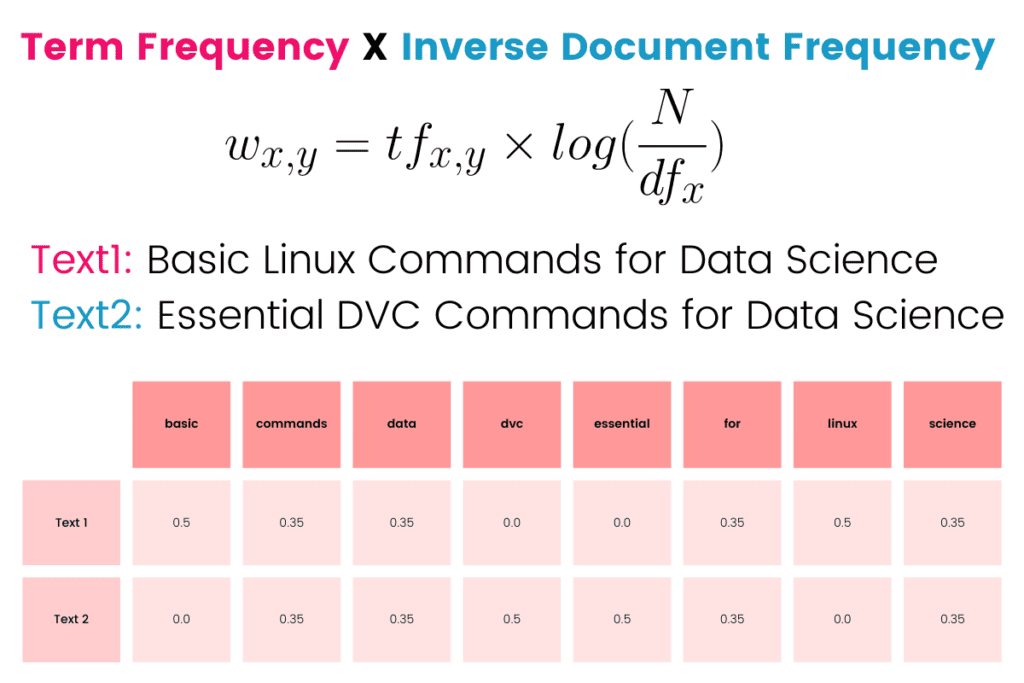

# <span style="color:#E888BB; font-size: 1%;">1 | DATA CLEANSING AND DATA PREP</span>
<div style="padding: 35px;color:white;margin:10;font-size:170%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/532173/pexels-photo-532173.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'> Prediction on Dataset </span></b> </div>

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(strip_accents='unicode',
                             analyzer='word',
                             ngram_range=(2, 3),
                             min_df=0.05,
                             max_df=0.9)

train_counts = vectorizer.fit_transform(df_train['full_text'])
test_counts = vectorizer.transform(df_test['full_text'])
y = np.array(df_train['score'])


In [ ]:
train_counts = train_counts.astype(np.float32)
test_counts = test_counts.astype(np.float32)

import lightgbm as lgb

params = {'metrics': 'None',           
            'learning_rate': 0.1,
            'max_depth': 5,
            'num_leaves': 15,
            'colsample_bytree': 0.5,
            'min_data_in_leaf': 100,
            'reg_alpha': 0.8,
            'n_estimators': 256,
            'verbosity': -1,}

model = lgb.LGBMClassifier(**params)
model.fit(train_counts, y)

score = model.predict(test_counts)

from catboost import CatBoostRegressor
from catboost import Pool, cv

cb_model = CatBoostRegressor(iterations=150,
                             learning_rate=0.06417237232323,
                             depth=6,                             
                             random_seed=42,
                             bagging_temperature=0.2,
                             od_type='Iter',
                             metric_period=5,
                             reg_lambda=0.8519118169741291)

train_pool = Pool(data=train_counts, label=y)


cv_params = {
    'fold_count': 5,
    'stratified': True,
    'shuffle': True,
    'partition_random_seed': 42,
    'verbose': True
}

cv_results = cv(train_pool, cb_model.get_params(), **cv_params)
cb_model.fit(train_counts, y)
print(cv_results)

score1 = cb_model.predict(test_counts)

In [ ]:

catboost_model = CatBoostRegressor(iterations=700,
                                   learning_rate=0.06417237232323,
                                   depth=6,                             
                                   random_seed=42,
                                   bagging_temperature=0.2,
                                   od_type='Iter',
                                   metric_period=5,
                                   reg_lambda=0.8519118169741291)

lgbm_model = lgb.LGBMRegressor(metrics='None',           
                                learning_rate=0.1,
                                max_depth=11,
                                num_leaves=15,
                                colsample_bytree=0.5,
                                min_data_in_leaf=100,
                                reg_alpha=0.8,
                                n_estimators=700,
                                verbosity=-1)

meta_estimator = LinearRegression()
kf = KFold(n_splits=5, shuffle=True, random_state=42)
stacked_model = StackingRegressor(estimators=[('catboost', catboost_model), ('lgbm', lgbm_model)],
                                  final_estimator=meta_estimator,
                                  cv=kf)

stacked_model.fit(train_counts, y)
test_predictions = stacked_model.predict(test_counts)

In [ ]:
test_predictions

In [ ]:
avyscore = test_predictions

In [ ]:
avyscore

In [ ]:
average_score_int = np.round(avyscore).astype(int)
print("Average Score:", average_score_int)

In [ ]:
df_sub['score'] = average_score_int

In [ ]:
df_sub.head()

In [ ]:
df_sub.to_csv('submission.csv', index=False)

<div class="alert alert-success"> 
        <h1 align="center" style="color:chocolate;">Looking Forward for feeback </h1>  
     
</div>

# Thank You! 🙏

<div style="box-shadow: rgba(0, 0, 0, 0.4) -5px 5px inset, rgba(0, 0, 0, 0.3) -10px 10px inset, rgba(0, 0, 0, 0.2) -15px 15px inset, rgba(0, 0, 0, 0.1) -20px 20px inset, rgba(0, 0, 0, 0.05) -25px 25px inset; padding:20px; font-size:30px; font-family: consolas; display:fill; border-radius:15px; color: rgba(0, 0, 0, 0.7)"> 
    <b>༼⁠ ⁠つ⁠ ⁠◕⁠‿⁠◕⁠ ⁠༽⁠つ Thank You!</b>
</div>

<p style="font-family:verdana; color:black; font-family: consolas; font-size: 16px;"> 
    💌 Thanks for your time and attention! If you have any feedback or suggestions, please share them. <br><br> 
    🚀 If you enjoyed this notebook, consider giving it an upvote to help others find it too. Your support means a lot! <br><br> 
    ❤️ Once again, thank you for your support, and I look forward to seeing you again soon!
</p>

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #7FFFD4; font-size:100%; text-align:left">

<h3 align="center"><font color='#DAA520'>💡 Refrences :</font></h3>
    
  